In [2]:
import pandas as pd
from sklearn.datasets import load_wine

dados = load_wine()
X, y = dados.data, dados.target

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
# Aqui poderiamos fazer a limepza e análise dos dados...

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# agora a gente poderia fazer um processo de normalização/padronização
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier()
dt = DecisionTreeClassifier(random_state=42)

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
from sklearn.metrics import classification_report

y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)

print("Random Forest: \n", classification_report(y_test, y_pred_rf))
print("Árvore de decisão: \n", classification_report(y_test, y_pred_dt))

Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Árvore de decisão: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



([<matplotlib.axis.XTick at 0x15cb63750>,
 [Text(0, 0, 'od280/od315_of_diluted_wines'),
  Text(1, 0, 'proline'),
  Text(2, 0, 'color_intensity'),
  Text(3, 0, 'flavanoids'),
  Text(4, 0, 'alcohol'),
  Text(5, 0, 'hue'),
  Text(6, 0, 'alcalinity_of_ash'),
  Text(7, 0, 'total_phenols'),
  Text(8, 0, 'malic_acid'),
  Text(9, 0, 'magnesium'),
  Text(10, 0, 'proanthocyanins'),
  Text(11, 0, 'ash'),
  Text(12, 0, 'nonflavanoid_phenols')])

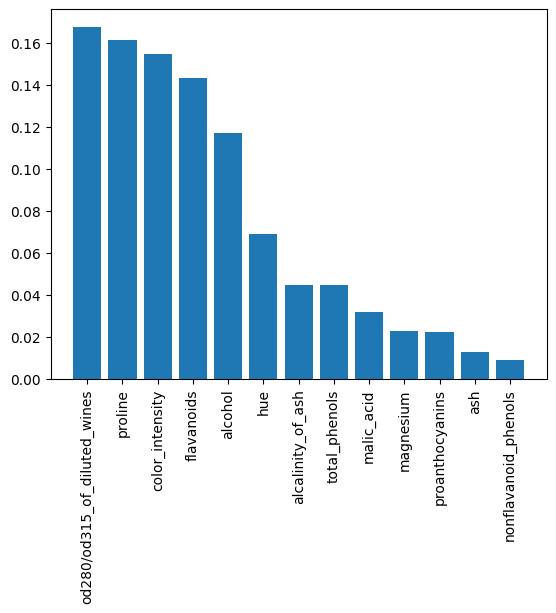

In [6]:
import numpy as np

importancia = rf.feature_importances_
indices_rf = np.argsort(importancia)[::-1]

import matplotlib.pyplot as plt
plt.bar(range(X.shape[1]), importancia[indices_rf], align="center")
plt.xticks(range(X.shape[1]), np.array(dados.feature_names)[indices_rf], rotation=90)

In [7]:
from sklearn.datasets import fetch_california_housing


dados = fetch_california_housing()
X, y = dados.data, dados.target

# aqui viria a limpeza

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor(max_depth=3)
dt = DecisionTreeRegressor()

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [9]:
from sklearn.metrics import r2_score

print("RF: ", r2_score(y_test, y_pred_rf))
print("DT: ", r2_score(y_test, y_pred_dt))

RF:  0.5414386063444769
DT:  0.612168838704312


([<matplotlib.axis.XTick at 0x15cb1d950>,
 [Text(0, 0, 'MedInc'),
  Text(1, 0, 'AveOccup'),
  Text(2, 0, 'AveRooms'),
  Text(3, 0, 'HouseAge'),
  Text(4, 0, 'Latitude'),
  Text(5, 0, 'Population'),
  Text(6, 0, 'Longitude'),
  Text(7, 0, 'AveBedrms')])

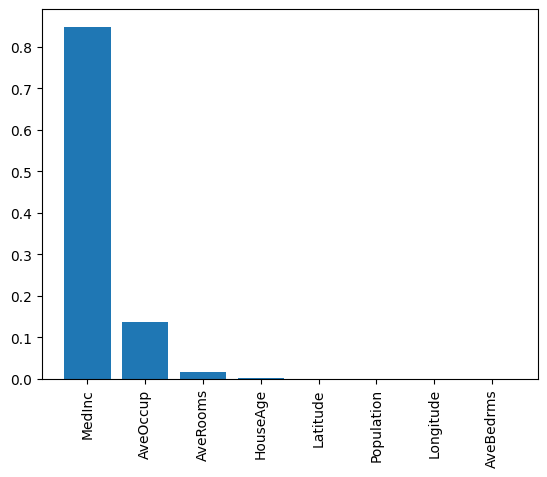

In [10]:
import numpy as np

importancia = rf.feature_importances_
indices_rf = np.argsort(importancia)[::-1]

import matplotlib.pyplot as plt
plt.bar(range(X.shape[1]), importancia[indices_rf], align="center")
plt.xticks(range(X.shape[1]), np.array(dados.feature_names)[indices_rf], rotation=90)

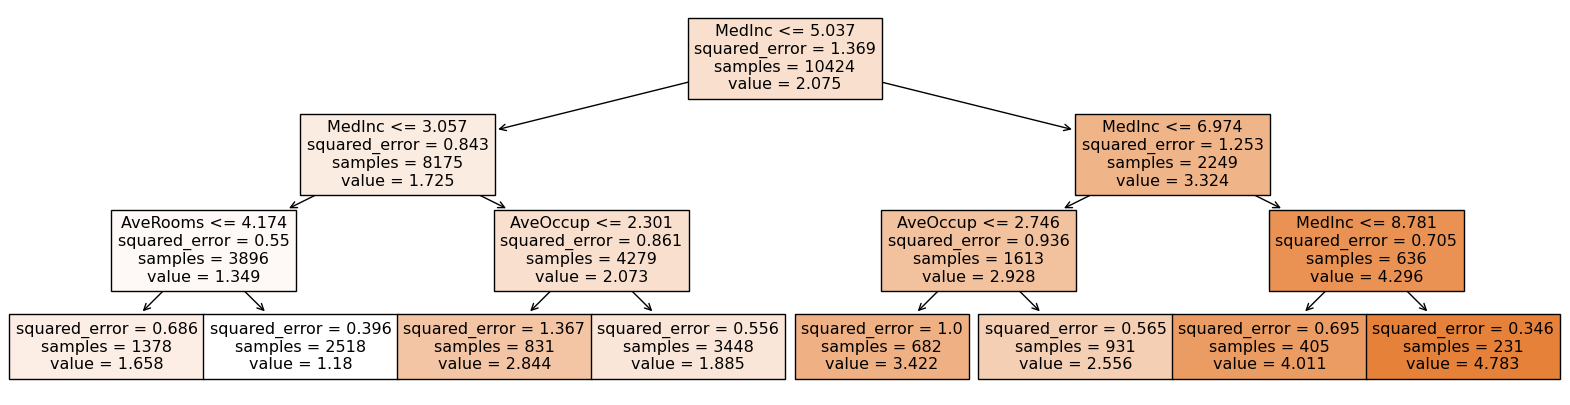

In [11]:
# Visualização
from sklearn import tree

plt.figure(figsize=(20, 5))
tree.plot_tree(rf.estimators_[0], feature_names=dados.feature_names, filled=True)
plt.show()

In [12]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [15]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [16]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=float)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0


In [17]:
X = df.drop(['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
rf = RandomForestRegressor(n_estimators= 710,
 min_samples_split= 10,
 min_samples_leaf= 8,
 max_depth= 5, random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_score(y_test, y_pred_rf)

0.8759606520540363

/Users/pnferreira-m1/anaconda3/envs/koru/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


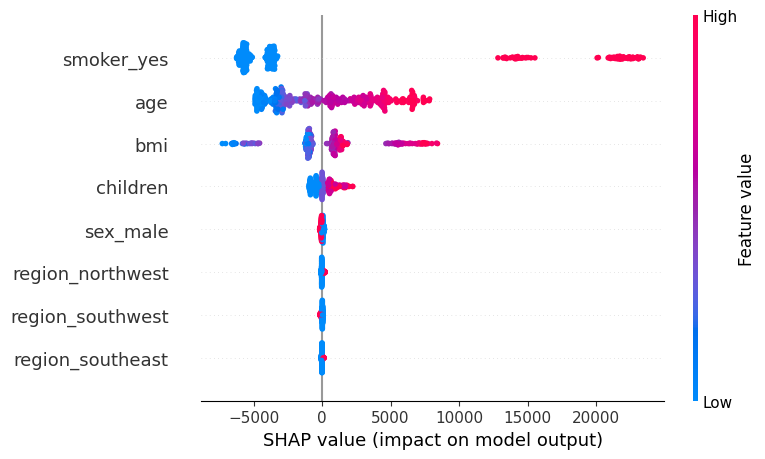

In [19]:
import shap
explainer = shap.Explainer(rf)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

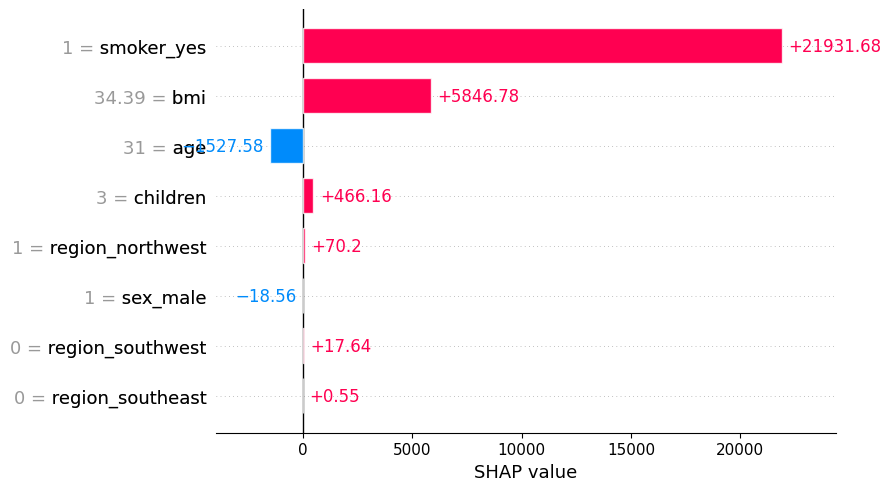

In [32]:
shap.plots.bar(shap_values[3])

In [30]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
662      5148.55260
1103    11363.28320
1333    10600.54830
332     13429.03540
355     24603.04837
Name: charges, Length: 402, dtype: float64

In [66]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf_info = {'n_estimators': np.arange(10, 1000, 50), 
           'max_depth': [None, 3, 5, 7, 10], 
           'min_samples_split': np.arange(2,20, 2),
           'min_samples_leaf': np.arange(1, 25, 1)}

rs_rf = RandomizedSearchCV(RandomForestRegressor(), 
                           param_distributions= rf_info,
                            n_iter=100,
                            verbose= True
                           )
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [67]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_depth': 5}

In [60]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf_info_grid = {'n_estimators': [210, 20], 
           'max_depth': [4, 5, 6], 
           'min_samples_split': [11, 12, 13],
           'min_samples_leaf': [4, 5, 6]}

gs_rf = GridSearchCV(RandomForestRegressor(), 
                           param_grid= rf_info_grid,
                            verbose= True
                           )
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [11, 12, 13],
                         'n_estimators': [210, 20]},
             verbose=True)

In [61]:
gs_rf.best_params_

{'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 210}